In [21]:
#Importing python Libraries to train the dataset with the MAchine learning model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score


In [22]:
from sklearn import preprocessing
#import torch
from sklearn import svm
from sklearn import tree
import pandas as pd
import pickle
import numpy as np
import seaborn as sns

In [23]:
#Loading the dataset with python library called Pandas
import pandas as pd
df = pd.read_csv('malgenome215dataset1260malware2539benign.csv')
df

,transact,bindService,onServiceConnected,ServiceConnection,android.os.Binder,READ_SMS,attachInterface,WRITE_SMS,TelephonyManager.getSubscriberId,Ljava.lang.Class.getCanonicalName,...,Ljava.lang.Object.getClass,SET_ORIENTATION,DEVICE_POWER,EXPAND_STATUS_BAR,GET_TASKS,GLOBAL_SEARCH,GET_PACKAGE_SIZE,SET_PREFERRED_APPLICATIONS,android.intent.action.PACKAGE_CHANGED,type
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,0,1,1,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3795,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3796,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3797,1,1,1,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [24]:
#Checking the shape of the dataset which has 3799 rows and 216 columns
df.shape

(3799, 216)

In [25]:
#number of benign and malicious
#Type is the label that represents if an application is a malware or not, as we can see this dataset is balanced.
df.type.value_counts()

1    2539
0    1260
Name: type, dtype: int64

In [26]:
#Malicious activities from the dataset
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11]

Binder                            2198
IBinder                           2174
android.os.IBinder                2174
INTERNET                          2098
Ljava.lang.Object.getClass        2065
android.content.pm.PackageInfo    2008
ACCESS_NETWORK_STATE              1943
onBind                            1813
Ljava.lang.Class.forName          1788
android.os.Binder                 1781
dtype: int64

In [27]:
#Benign activities from the dataset
pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10]

INTERNET                                1232
Binder                                  1189
android.os.IBinder                      1189
IBinder                                 1189
READ_PHONE_STATE                        1179
onBind                                  1170
TelephonyManager.getDeviceId            1095
android.intent.action.BOOT_COMPLETED    1061
android.content.pm.PackageInfo          1052
Ljava.lang.Object.getClass              1042
dtype: int64

<AxesSubplot:>

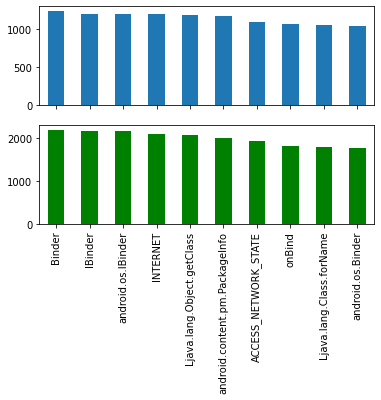

In [28]:
#The plot depicts the various permission from various application in the android system
import matplotlib.pyplot as plt
fig, axs =  plt.subplots(nrows=2, sharex=True)

pd.Series.sort_values(df[df.type==0].sum(axis=0), ascending=False)[:10].plot.bar(ax=axs[0])
pd.Series.sort_values(df[df.type==1].sum(axis=0), ascending=False)[1:11].plot.bar(ax=axs[1], color="green")

In [29]:
#Modeling
#Here we are splitting the dataset into training and testing subset for the model training using machine learning algorithm
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:330], df['type'], test_size=0.20, random_state=42)

In [30]:
# Naive Bayes algorithm (yes)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# pred
pred = gnb.predict(X_test)

# accuracy
accuracy = accuracy_score(pred, y_test)
print("naive_bayes")
print(accuracy)
print(classification_report(pred, y_test, labels=None))

import time
start = time.time()
gnb.fit(X_test, y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

naive_bayes
0.9986842105263158
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       1.00      1.00      1.00       495

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Training time: 0.0060045719146728516s


In [31]:
#Decision Tree (yes)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
# accuracy
accuracy = accuracy_score(pred, y_test)
print(clf)
print(accuracy)
print(classification_report(pred, y_test, labels=None))

import time
start = time.time()
clf.fit(X_test, y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

DecisionTreeClassifier()
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       494

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Training time: 0.003986835479736328s


In [32]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print(clf)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(pred, y_test, labels=None))

import time
start = time.time()
clf.fit(X_test, y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

SVC(kernel='linear')
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       266
           1       1.00      1.00      1.00       494

    accuracy                           1.00       760
   macro avg       1.00      1.00      1.00       760
weighted avg       1.00      1.00      1.00       760

Training time: 0.01694321632385254s


In [33]:
# Model Precision: what percentage of positive tuples are labeled as such?
#Precision is the fraction of information retrieved that are relevant.
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
#Recall is the fraction of relevant information that are retrieved.
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


In [34]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)

    
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print(gb)
print("Classification Report")
print(classification_report(y_test, predictions))

import time
start = time.time()
gb.fit(X_test, y_test)
stop = time.time()
print(f"Training time: {stop - start}s")

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       266
           1       0.94      0.99      0.97       494

    accuracy                           0.95       760
   macro avg       0.96      0.94      0.95       760
weighted avg       0.96      0.95      0.95       760

Training time: 0.008972644805908203s


In [35]:
#Desicion tree
#gradient boosting algorithm
#SVM
#naive Bayes
#To tabulate the result we import tabulate library from python.

In [36]:
!pip install tabulate

In [38]:
from tabulate import tabulate

algo_table = [("Decision Tree",  "0.97" ,"0.98"," 5.383"), 
              ("Gradient Boost","0.95","0.96","6.939"), 
              ("Support Vector Machine", "0.98","0.69","7.249"),
             ("Naive Bayes" ,"0.67","0.69"," 6.204")]

headers = ["Algorithm","Accuracy","f1-Score","Training Time"]

print(tabulate(algo_table, headers))

Algorithm                 Accuracy    f1-Score    Training Time
----------------------  ----------  ----------  ---------------
Decision Tree                 0.97        0.98            5.383
Gradient Boost                0.95        0.96            6.939
Support Vector Machine        0.98        0.69            7.249
Naive Bayes                   0.67        0.69            6.204
